In [8]:
import os
import pandas as pd
import glob

## Importa os arquivos para um dataframe

In [3]:
folder_threated = "resources/bases/tratada/"

In [57]:
all_files = glob.glob(folder_threated + "/*.txt")

li = []

for filename in all_files:
    df = pd.read_csv(filename, sep="|", names=["position", "artist", "music"])
    df["year"] = filename.split("/")[-1].replace("_ok.txt", "")
    li.append(df)

df = pd.concat(li, ignore_index=True, sort=True)

list_total = len(li)

In [26]:
df.head()

,artist,music,position,year
0,METALLICA,FUEL,500,2017
1,YES,CHANGES,499,2017
2,LINKIN PARK,IN THE END,498,2017
3,RUSH,XANADU,497,2017
4,SYSTEM OF A DOWN,CHOP SUEY!,496,2017


<AxesSubplot:xlabel='year'>

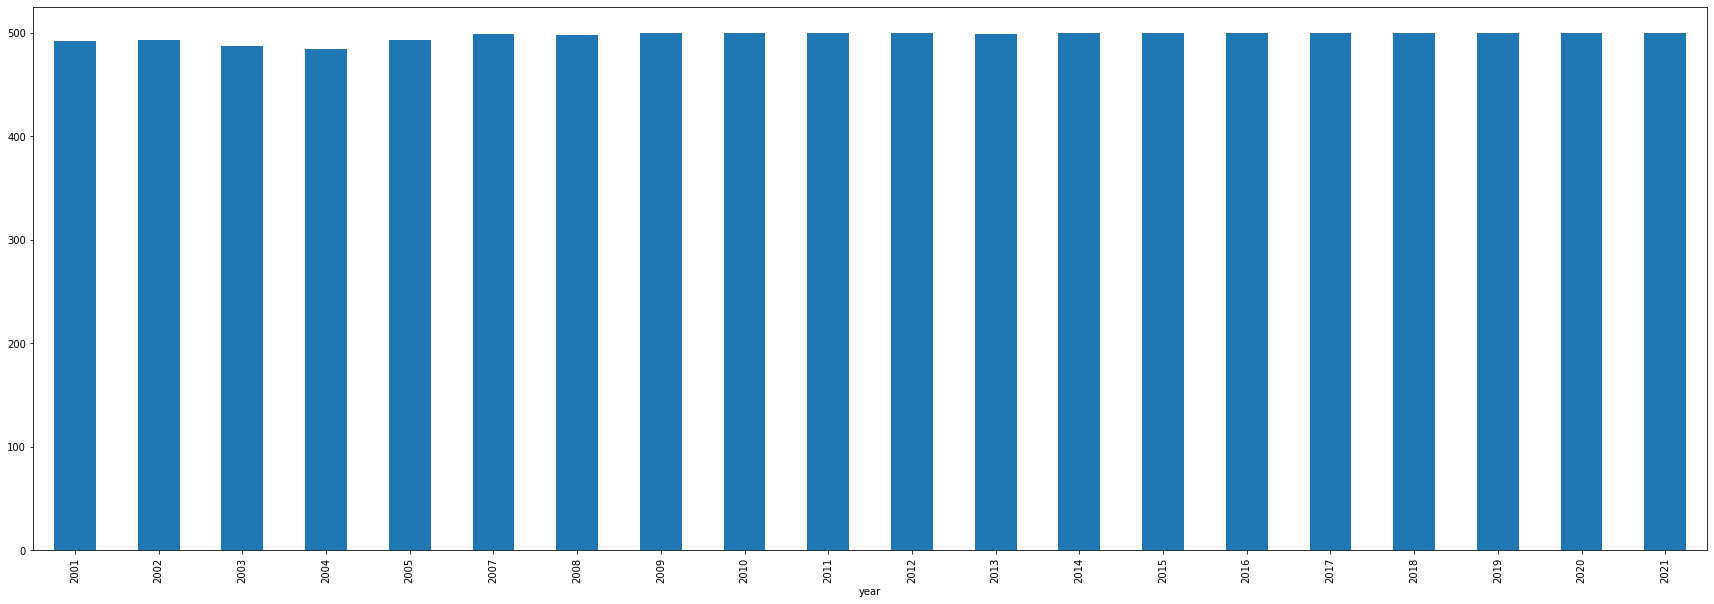

In [32]:
groups = df.groupby(['year']).size()
groups.plot.bar(figsize=(30,10))

In [58]:
print(f"Hoje temos {list_total} arquivos para trabalhar")

Hoje temos 20 arquivos para trabalhar


## Get TOP 10 artistas da lista

Somando todas as listas

In [41]:
df['artist'].value_counts()[:10]

LED ZEPPELIN    253
QUEEN           233
THE BEATLES     193
AEROSMITH       189
PINK FLOYD      175
RUSH            173
AC/DC           171
VAN HALEN       164
KISS            159
DEEP PURPLE     150
Name: artist, dtype: int64

## **Get TOP 10 músicas da lista**

Não resolve pegar só a música porque tem bandas com músicas com mesmo nome

In [42]:
df['music'].value_counts()[:10]

ONE                     26
LIKE A ROLLING STONE    23
DREAMS                  23
SOMEBODY TO LOVE        23
REVOLUTION              23
CHANGES                 23
TIME                    22
TURNER OVERDRIVE        21
DREAM ON                21
JAILBREAK               21
Name: music, dtype: int64

In [55]:
df.groupby(['artist', 'music']).size().sort_values(ascending=False)[:30] 

artist          music                  
DEEP PURPLE     PERFECT STRANGERS          20
BACHMAN         TURNER OVERDRIVE           20
RUSH            TOM SAWYER                 19
??              ??                         19
LED ZEPPELIN    STAIRWAY TO HEAVEN         19
DIRE STRAITS    MONEY FOR NOTHING          19
LED ZEPPELIN    BLACK DOG                  19
LYNYRD SKYNYRD  SWEET HOME ALABAMA         19
GENESIS         MAMA                       19
JETHRO TULL     AQUALUNG                   18
VAN HALEN       PANAMA                     18
BLACK SABBATH   PARANOID                   18
VAN HALEN       JUMP                       18
PINK FLOYD      TIME                       18
AC/DC           BACK IN BLACK              18
MIDNIGHT OIL    BEDS ARE BURNING           18
YES             OWNER OF A LONELY HEART    18
STEPPENWOLF     BORN TO BE WILD            18
DEEP PURPLE     SMOKE ON THE WATER         18
AC/DC           JAILBREAK                  17
QUEEN           WE WILL ROCK YOU        

{}


## Quais/quantas músicas estão presentes em todas as listas ?